Notes!

Github!: https://github.com/annahollandkeener/L-D2/commits/main

Imports

In [954]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading data and converting to dataframe. Creating new dataframes for each flow range. 

In [955]:
flows = pd.read_csv("flow.csv", converters={"MF":int})

df = pd.DataFrame(flows)

catchall = []

range0_1500 = {
    'Month' : [],
    'Day' : [],
    'Flow' : [],
    }
range0_1500df = pd.DataFrame(range0_1500)


range1500_3500 = {
    'Month' : [],
    'Day' : [],
    'Flow' : [],
    }
range1500_3500df = pd.DataFrame(range1500_3500)

range3500_7500 = {
    'Month' : [],
    'Day' : [],
    'Flow' : [],
    }
range3500_7500df = pd.DataFrame(range3500_7500)

range7500_10000 = {
    'Month' : [],
    'Day' : [],
    'Flow' : [],
    }
range7500_10000df = pd.DataFrame(range7500_10000)


rangeOver10000 = {
    'Month' : [],
    'Day' : [],
    'Flow' : [],
    }
rangeOver10000df = pd.DataFrame(rangeOver10000)


New row function.

In [956]:
x = 0
def new_row(dataFrame, flow):
    new_row = {'Month': df['Month'][x], 'Day': df['Day'][x], 'Flow': flow}
    return new_row

Sorting days into corresponding dataframe flow ranges.

In [957]:

for flow in df['MF']:
    if flow <= 1500:
        range0_1500df = range0_1500df.append(new_row(range0_1500df, flow), ignore_index=True)
        x += 1
    elif ((flow > 1500) & (flow <= 3500)):
        range1500_3500df = range1500_3500df.append(new_row(range3500_7500df, flow), ignore_index=True)
        x += 1
    elif ((flow > 3500) & (flow <= 7500)):
        range3500_7500df = range3500_7500df.append(new_row(range3500_7500df, flow), ignore_index=True)
        x += 1
    elif ((flow > 7500) & (flow <= 10000)):
        range7500_10000df = range7500_10000df.append(new_row(range7500_10000df, flow), ignore_index=True)
        x += 1
    elif (flow > 10000):
        rangeOver10000df = rangeOver10000df.append(new_row(rangeOver10000df, flow), ignore_index=True)
        x += 1
    else:
        catchall.append(flow)
        x += 1


Function for recording each instance of flow rate and how long flow rate remained within range.  

In [958]:
def flow_duration(rangeDF, instanceDF):
    i = 0
    curr = i
    nex = i + 1

    while i < (len(rangeDF['Day']) - 1):
        consecutive = True
        duration = 1

        while consecutive == True:
            if nex == len(rangeDF):
                consecutive = False
                new_row = {'dayStart': rangeDF['Day'][i], 'duration': duration}
                instanceDF = instanceDF.append(new_row, ignore_index=True)
                i = curr
                return instanceDF
            else:
                if (((rangeDF['Day'][nex]) - 1) == (rangeDF['Day'][curr])):
                    consecutive = True
                    duration += 1
                    curr += 1
                    nex += 1
                else:
                    consecutive = False
                    new_row = {'dayStart': rangeDF['Day'][i], 'duration': duration}
                    instanceDF = instanceDF.append(new_row, ignore_index=True)
                    curr += 1
                    nex += 1
                    i = curr

Creating dataframes to hold instance duration dataframes. 

In [959]:
instances0_1500 = {
    'dayStart' : [],
    'duration' : [],
    }

instances0_1500 = pd.DataFrame(instances0_1500)
instances0_1500 = flow_duration(range0_1500df, instances0_1500)

print("0-1500")
print("Number of instances: " + str(len(instances0_1500)))

display(instances0_1500)


instances1500_3500 = {
    'dayStart' : [],
    'duration' : [],
    }

instances1500_3500 = pd.DataFrame(instances1500_3500)
instances1500_3500 = flow_duration(range1500_3500df, instances1500_3500)

print("\b1500-3500")
print("Number of instances: " + str(len(instances1500_3500)))
display(instances1500_3500)

instances3500_7500 = {
    'dayStart' : [],
    'duration' : [],
    }

instances3500_7500 = pd.DataFrame(instances3500_7500)
instances3500_7500 = flow_duration(range3500_7500df, instances3500_7500)

print("3500-7500")
print("Number of instances: " + str(len(instances3500_7500)))
display(instances3500_7500)

instances7500_10000 = {
    'dayStart' : [],
    'duration' : [],
    }

instances7500_10000 = pd.DataFrame(instances7500_10000)
instances7500_10000 = flow_duration(range7500_10000df, instances7500_10000)

print("7500-10000")
print("Number of instances: " + str(len(instances7500_10000)))
display(instances7500_10000)

instancesOver10000 = {
    'dayStart' : [],
    'duration' : [],
    }

instancesOver10000 = pd.DataFrame(instancesOver10000)
instancesOver10000 = flow_duration(rangeOver10000df, instancesOver10000)

print("> 10000")
print("Number of instances: " + str(len(instancesOver10000)))
display(instancesOver10000)

0-1500
Number of instances: 1


,dayStart,duration
0,243.0,3.0


1500-3500
Number of instances: 10


,dayStart,duration
0,132.0,6.0
1,166.0,7.0
2,176.0,7.0
3,198.0,20.0
4,220.0,7.0
5,228.0,1.0
6,231.0,2.0
7,239.0,4.0
8,246.0,14.0
9,299.0,10.0


3500-7500
Number of instances: 22


,dayStart,duration
0,21.0,5.0
1,33.0,3.0
2,43.0,1.0
3,84.0,5.0
4,91.0,11.0
5,104.0,4.0
6,114.0,9.0
7,125.0,7.0
8,138.0,28.0
9,173.0,3.0


7500-10000
Number of instances: 19


,dayStart,duration
0,1.0,2.0
1,9.0,5.0
2,16.0,5.0
3,26.0,7.0
4,36.0,7.0
5,44.0,4.0
6,59.0,1.0
7,61.0,23.0
8,89.0,2.0
9,102.0,2.0


> 10000
Number of instances: 5


,dayStart,duration
0,3.0,6.0
1,14.0,2.0
2,48.0,11.0
3,60.0,1.0
4,360.0,3.0


Display Settings

In [960]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

legend_entries = [
    plt.Line2D([0], [0], marker='s', color='lightblue', label='January', markersize=15, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='#a5d6c5', label='February', markersize=15, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='#84ad89', label='March', markersize=15, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='#b0c27a', label='April', markersize=15, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='#f5f587', label='May', markersize=15, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='#e0b15a', label='June', markersize=15, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='#e89464', label='July', markersize=15, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='#b37659', label='August', markersize=15, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='#b06363', label='September', markersize=15, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='#f27c7c', label='October', markersize=15, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='#c086c4', label='November', markersize=15, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='#b6abcc', label='December', markersize=15, linestyle='None'),

]
def monthColors(plot):
    plt.axvspan(1, 31, facecolor='lightblue', alpha=0.5) #jan
    plt.axvspan(31, 60, facecolor="#a5d6c5", alpha=.5) #feb
    plt.axvspan(60, 91, facecolor="#84ad89", alpha=0.5) #mar
    plt.axvspan(91, 121, facecolor="#b0c27a", alpha=0.5) #apr
    plt.axvspan(121, 152, facecolor="#f5f587", alpha=0.5) #may
    plt.axvspan(152, 182, facecolor="#e0b15a", alpha=0.5) #jun
    plt.axvspan(182, 213, facecolor="#e89464", alpha=0.5) #jul
    plt.axvspan(213, 244, facecolor="#b37659", alpha=0.5) #aug
    plt.axvspan(244, 274, facecolor="#b06363", alpha=0.5) #sep
    plt.axvspan(274, 305, facecolor="#f27c7c", alpha=0.5) #oct
    plt.axvspan(305, 335, facecolor="#c086c4", alpha=0.5) #nov
    plt.axvspan(335, 366, facecolor="#b6abcc", alpha=0.5) #dec


ytick_positions = [1500, 3500, 7500, 10000]  # Define the Y-axis tick positions
ytick_labels = ['1500', '3500', '7500', '10000']  # Define the labels for the tick positions

xtick_positions = [1, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 366]  # Define the Y-axis tick positions
xtick_labels = ['1', '31', '60', '91', '121', '152', '182', '213', '244', '274', '305', '335', '366']  # Define the labels for the tick positions



Creation of chart demonstrating how long the river flows at each range

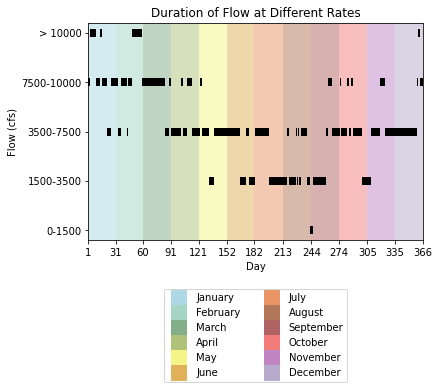

In [961]:


fig, ax = plt.subplots()


tuples0_1500= []
for i in range(len(instances0_1500)):
    new_tuple = (instances0_1500['dayStart'][i], instances0_1500['dayStart'][i] + instances0_1500['duration'][i])
    tuples0_1500.append(new_tuple)
#print(tuples0_1500)

for start, end in tuples0_1500:
    ax.hlines(y=['0-1500'], xmin=start, xmax=end, color='black', linewidth=8)

tuples1500_3500 = []
for i in range(len(instances1500_3500)):
    new_tuple = (instances1500_3500['dayStart'][i], instances1500_3500['dayStart'][i] + instances1500_3500['duration'][i])
    tuples1500_3500.append(new_tuple)
#print(tuples1500_3500)


for start, end in tuples1500_3500:
    ax.hlines(y=['1500-3500'], xmin=start, xmax=end, color='black', linewidth=8)


tuples3500_7500 = []
for i in range(len(instances3500_7500)):
    new_tuple = (instances3500_7500['dayStart'][i], instances3500_7500['dayStart'][i] + instances3500_7500['duration'][i])
    tuples3500_7500.append(new_tuple)
#print(tuples3500_7500)


for start, end in tuples3500_7500:
    ax.hlines(y=['3500-7500'], xmin=start, xmax=end, color='black', linewidth=8)


tuples7500_10000 = []
for i in range(len(instances7500_10000)):
    new_tuple = (instances7500_10000['dayStart'][i], instances7500_10000['dayStart'][i] + instances7500_10000['duration'][i])
    tuples7500_10000.append(new_tuple)
#print(tuples7500_10000)


for start, end in tuples7500_10000:
    ax.hlines(y=['7500-10000'], xmin=start, xmax=end, color='black', linewidth=8)

tuplesOver10000 = []
for i in range(len(instancesOver10000)):
    new_tuple = (instancesOver10000['dayStart'][i], instancesOver10000['dayStart'][i] + instancesOver10000['duration'][i])
    tuplesOver10000.append(new_tuple)
#print(tuplesOver10000)


for start, end in tuplesOver10000:
    ax.hlines(y=['> 10000'], xmin=start, xmax=end, color='black', linewidth=8)


plt.title("Duration of Flow at Different Rates")
plt.xlabel("Day")
plt.ylabel("Flow (cfs)")
plt.xlim(1, 366)
plt.xticks(xtick_positions, xtick_labels)
monthColors(plt)
plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)
plt.show()

Flow range instance bar charts.

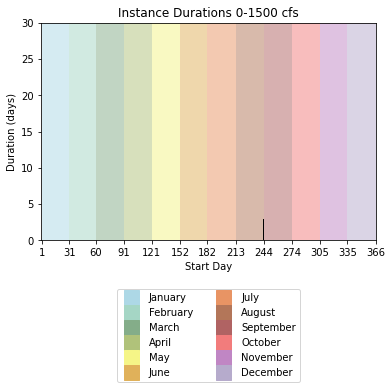

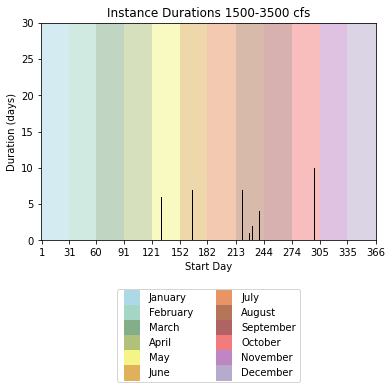

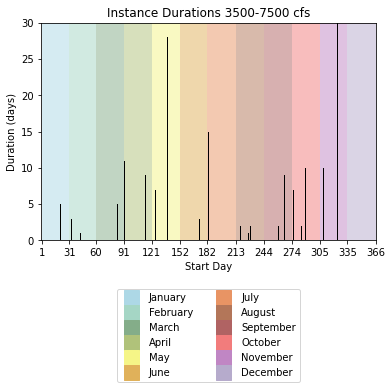

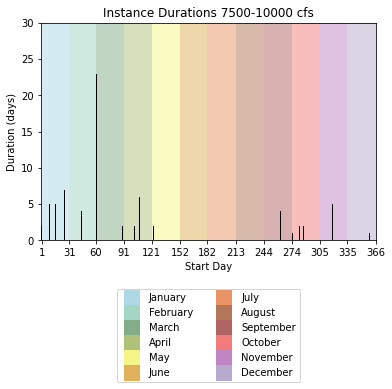

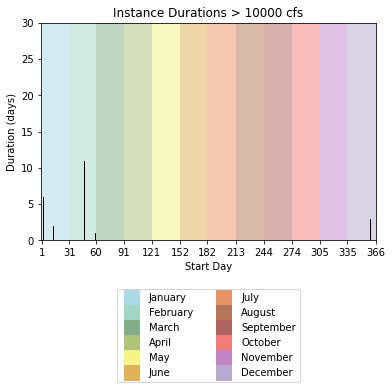

In [962]:
plt.bar(instances0_1500['dayStart'], instances0_1500['duration'], zorder = 2, color = 'black')
plt.title("Instance Durations 0-1500 cfs")
plt.xlim(0, 366)
plt.xticks(xtick_positions, xtick_labels)
plt.ylim(0, 30)
plt.xlabel("Start Day")
plt.ylabel("Duration (days)")
monthColors(plt)
plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)
plt.show()

plt.bar(instances1500_3500['dayStart'], instances1500_3500['duration'], zorder = 2, color = 'black')
plt.title("Instance Durations 1500-3500 cfs")
plt.xlim(0,366)
plt.xticks(xtick_positions, xtick_labels)
plt.ylim(0, 30)
plt.xlabel("Start Day")
plt.ylabel("Duration (days)")
monthColors(plt)
plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)
plt.show()

plt.bar(instances3500_7500['dayStart'], instances3500_7500['duration'], zorder = 2, color = 'black')
plt.title("Instance Durations 3500-7500 cfs")
plt.xlim(0, 366)
plt.xticks(xtick_positions, xtick_labels)
plt.ylim(0, 30)
plt.xlabel("Start Day")
plt.ylabel("Duration (days)")
monthColors(plt)
plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)
plt.show()

plt.bar(instances7500_10000['dayStart'], instances7500_10000['duration'], zorder = 2, color = 'black')
plt.title("Instance Durations 7500-10000 cfs")
plt.xlim(0, 366)
plt.xticks(xtick_positions, xtick_labels)
plt.ylim(0, 30)
plt.xlabel("Start Day")
plt.ylabel("Duration (days)")
monthColors(plt)
plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)
plt.show()

plt.bar(instancesOver10000['dayStart'], instancesOver10000['duration'], zorder = 2, color = 'black')
plt.title("Instance Durations > 10000 cfs")
plt.xlim(0, 366)
plt.xticks(xtick_positions, xtick_labels)
plt.ylim(0, 30)
plt.xlabel("Start Day")
plt.ylabel("Duration (days)")
monthColors(plt)
plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)
plt.show()

Range 0-1500

Number of days: 3


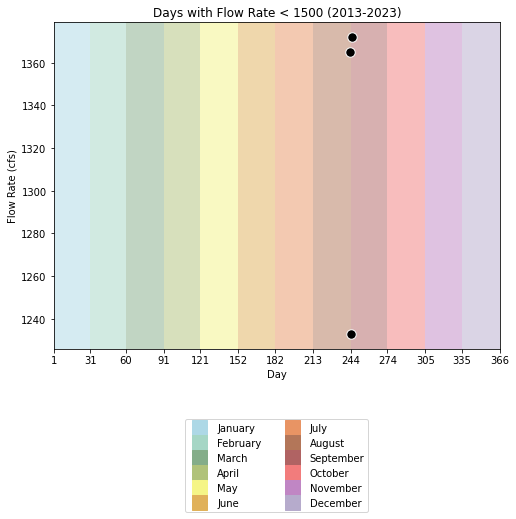

,Month,Day,Flow
0,8.0,243.0,1365.0
1,8.0,244.0,1233.0
2,9.0,245.0,1372.0


In [963]:
plt.figure(figsize=(8, 6))

plt.scatter(range0_1500df['Day'], range0_1500df['Flow'], color='black', linestyle='None', zorder=2, marker='o', edgecolor='white', s=90)
plt.title("Days with Flow Rate < 1500 (2013-2023)")
plt.xlabel("Day")
plt.ylabel("Flow Rate (cfs)")
plt.xlim(1, 366)
plt.xticks(xtick_positions, xtick_labels)

monthColors(plt)

plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)
print("Number of days: " + str(len(range0_1500df)))

plt.show()

display(range0_1500df)

Range 1500-3500

Number of days: 78


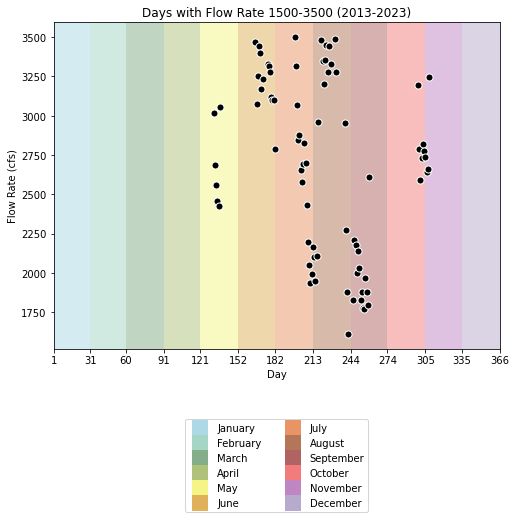

In [964]:
plt.figure(figsize=(8, 6))

plt.scatter(range1500_3500df['Day'], range1500_3500df['Flow'], label='Scatter Plot', marker='o', edgecolor='white',color='black', linestyle='None', zorder=2, s=50)
plt.title("Days with Flow Rate 1500-3500 (2013-2023)")
plt.xlabel("Day")
plt.ylabel("Flow Rate (cfs)")
plt.xlim(1, 366)
plt.xticks(xtick_positions, xtick_labels)

monthColors(plt)


plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)

print("Number of days: " + str(len(range1500_3500df)))

plt.show()

#display(range1500_3500df)

Range 3500-7500

Number of days: 177


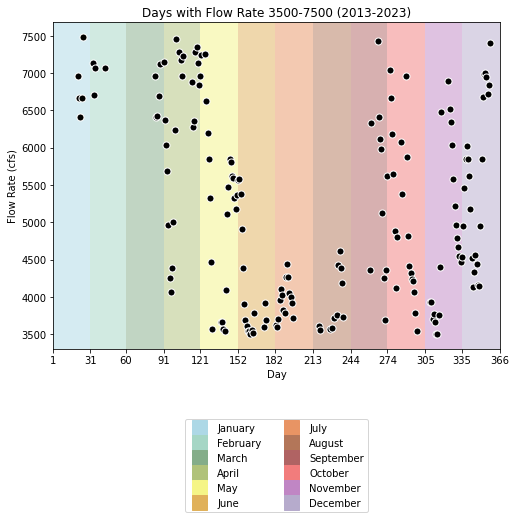

In [965]:
plt.figure(figsize=(8, 6))

plt.scatter(range3500_7500df['Day'], range3500_7500df['Flow'], label='Scatter Plot', marker='o', edgecolor='white',color='black', linestyle='None', zorder=2, s=50)
plt.title("Days with Flow Rate 3500-7500 (2013-2023)")
plt.xlabel("Day")
plt.ylabel("Flow Rate (cfs)")
plt.xlim(1, 366)
plt.xticks(xtick_positions, xtick_labels)

monthColors(plt)

plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)

print("Number of days: " + str(len(range3500_7500df)))

plt.show()

#display(range3500_7500df)

Range 7500-10000


Number of days: 85


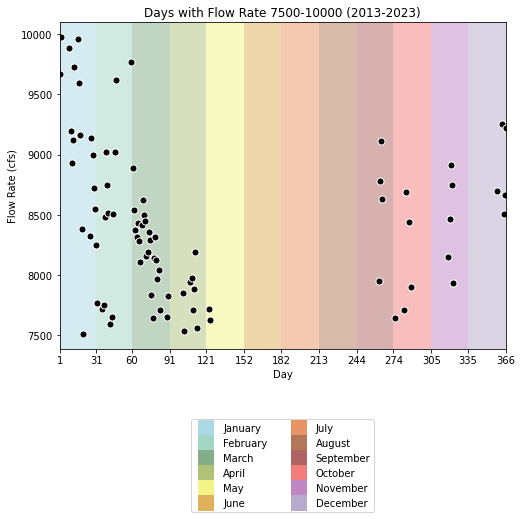

In [966]:
plt.figure(figsize=(8, 6))

plt.scatter(range7500_10000df['Day'], range7500_10000df['Flow'], label='Scatter Plot', marker='o', edgecolor='white',color='black', linestyle='None', zorder=2, s=50)
plt.title("Days with Flow Rate 7500-10000 (2013-2023)")
plt.xlabel("Day")
plt.xlim(1,366)
plt.xticks(xtick_positions, xtick_labels)
plt.ylabel("Flow Rate (cfs)")


monthColors(plt)

plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)

print("Number of days: " + str(len(range7500_10000df)))

plt.show()


#display(range7500_10000df)

Range 10000+


Number of days: 23


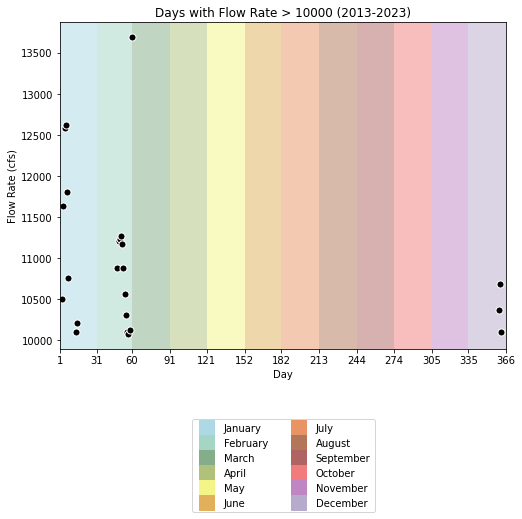

In [967]:
plt.figure(figsize=(8, 6))

plt.scatter(rangeOver10000df['Day'], rangeOver10000df['Flow'], label='Scatter Plot', marker='o', edgecolor='white',color='black', linestyle='None', zorder=2, s=50)
plt.title("Days with Flow Rate > 10000 (2013-2023)")
plt.xlabel("Day")
plt.ylabel("Flow Rate (cfs)")

plt.xlim(1, 366)
plt.xticks(xtick_positions, xtick_labels)

monthColors(plt)

plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)

print("Number of days: " + str(len(rangeOver10000df)))

plt.show()

#display(rangeOver10000df)

All flows graph

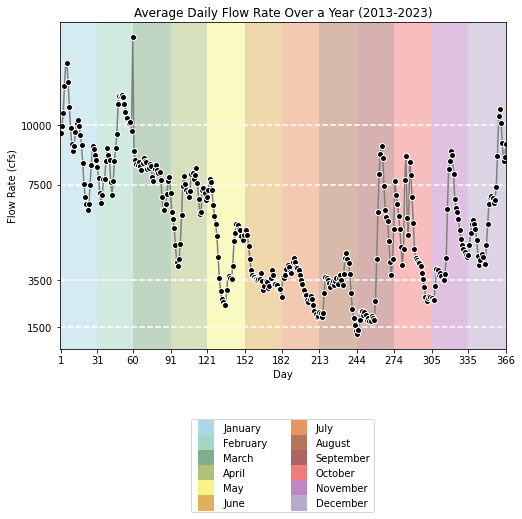

In [968]:
plt.figure(figsize=(8, 6))

plt.plot(df["Day"], df["MF"], color='gray', zorder = 2, marker = 'o', markerfacecolor = 'black', markeredgecolor = "white", linestyle = '-')
plt.title("Average Daily Flow Rate Over a Year (2013-2023)")
plt.xlabel("Day")
plt.ylabel("Flow Rate (cfs)")

ytick_positions = [1500, 3500, 7500, 10000]  # Define the Y-axis tick positions
ytick_labels = ['1500', '3500', '7500', '10000']  # Define the labels for the tick positions

plt.yticks(ytick_positions, ytick_labels)

plt.xticks(xtick_positions, xtick_labels)


plt.axhline(y=1500, color='white', linestyle='--', label='Horizontal Line at y=0', zorder=1)
plt.axhline(y=3500, color='white', linestyle='--', label='Horizontal Line at y=0', zorder = 1)
plt.axhline(y=7500, color='white', linestyle='--', label='Horizontal Line at y=0', zorder = 1)
plt.axhline(y=10000, color='white', linestyle='--', label='Horizontal Line at y=0', zorder = 1)






plt.xlim(0, 366)

monthColors(plt)

plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)


plt.show()



All flows dataframe

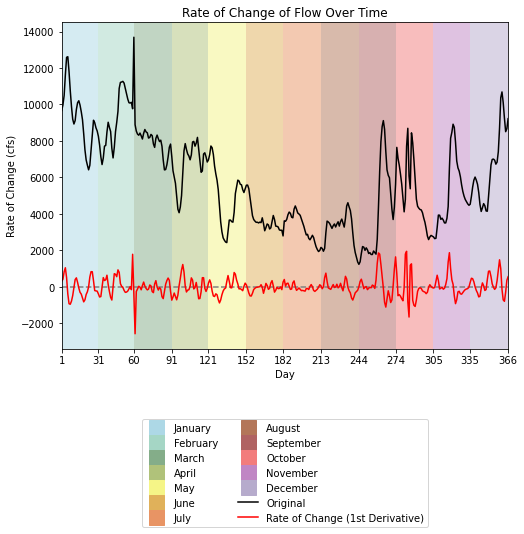

In [969]:
x_data = df["Day"]
y_data = df["MF"]

# Calculate the first derivative using np.gradient()
y_derivative = np.gradient(y_data, x_data)
y_derivative2 = np.diff(y_data) / np.diff(x_data)  # Approximate derivative

# Create a graph to plot the first derivative
plt.figure(figsize=(8, 6))

# Plot the original data
plt.plot(x_data, y_data, label='Original Data', color='black', linestyle = '-')
plt.xlim(1, 366)
plt.xticks(xtick_positions, xtick_labels)
plt.title('Rate of Change of Flow Over Time')
plt.xlabel('Day')
plt.ylabel("Rate of Change (cfs)")
plt.axhline(y=0, color='gray', linestyle='--', zorder=1)


# Plot the first derivative
plt.plot(x_data, y_derivative, label='First Derivative', color='red', linestyle = '-')

monthColors(plt)

legend_entries.append(plt.Line2D([0], [0], color='black', label='Original', markersize=15, linestyle='-'))
legend_entries.append(plt.Line2D([0], [0], color='red', label='Rate of Change (1st Derivative)', markersize=15, linestyle='-'))
plt.legend(handles=legend_entries, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)





In [971]:
#display(df)

Flow Duration Curver (% Exceedance)

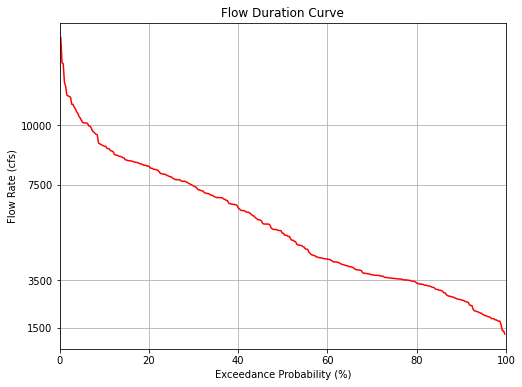

In [989]:
def fdc(dataframe, flows):
    sortedFlows = sorted(dataframe[flows], reverse=True)

    n = len(sortedFlows)
    exceedance_prob = np.arange(1, n + 1) / (n + 1) * 100

    plt.figure(figsize=(8, 6))
    plt.plot(exceedance_prob, sortedFlows, linestyle='-', color='red')
    plt.xlim(0, 100)
    plt.xlabel('Exceedance Probability (%)')
    plt.ylabel('Flow Rate (cfs)')
    plt.title('Flow Duration Curve')
    plt.grid(True)
    plt.yticks(ytick_positions, ytick_labels)
    plt.show()

fdc(df, 'MF')




